# Lab 1 - Decision Trees
6252320 Leon Debnath

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Initially we define a function that will allow us to easily create a decision tree and modify the variables that we want to experiment with.  Our output value is the accuracy of the model against a test/train split that we will maintain using the random seed to allow for reproduceability.

In [2]:
def decision_tree(X, Y, levels, min_samples_leaf):
    # Split X and Y into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                        test_size=0.33, 
                                                        random_state=66)
    
    # Set the max depth automatically to `None` if 0
    if levels == 0:
        max_depth = None
    else:
        max_depth = levels
        
    # Create a decision tree and train it
    clf = tree.DecisionTreeClassifier(criterion = 'entropy',
                                      min_samples_leaf=min_samples_leaf, 
                                      max_depth=max_depth)
    clf.fit(X_train, Y_train)
    
    # Predict the values for the test set and return the accuracy and tree
    Y_hat = clf.predict(X_test)
    
    data = {'accuracy': accuracy_score(Y_test, Y_hat),
           'clf' : clf}
    
    return data

## Diabetes Data Set
Next we read in the Diabetes data example and split the data into X and Y values.

In [3]:
data = pd.read_csv('diabetes.csv')
X = data.drop('class', axis=1)
Y = data['class']

Training the tree with a single level and a minimum of 1 sample per leaf gives us an accuracy of around 70%.

accuracy at 1 level is: 0.6535433070866141


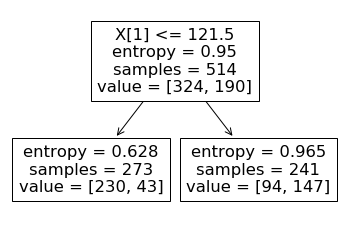

In [4]:
data = decision_tree(X, Y, levels=1, min_samples_leaf=1)
print('accuracy at 1 level is: ' + str(data['accuracy']))
tree.plot_tree(data['clf']);

accuracy at 2 levels is: 0.7598425196850394


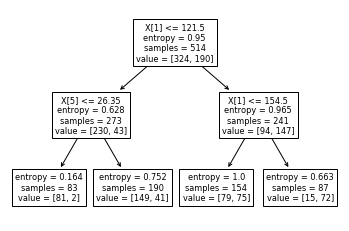

In [5]:
data = decision_tree(X, Y, levels=2, min_samples_leaf=1)
print('accuracy at 2 levels is: ' + str(data['accuracy']))
tree.plot_tree(data['clf']);

accuracy at 3 levels is: 0.7047244094488189


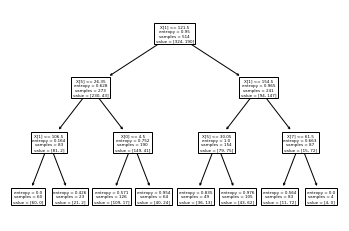

In [6]:
data = decision_tree(X, Y, levels=3, min_samples_leaf=1)
print('accuracy at 3 levels is: ' + str(data['accuracy']))
tree.plot_tree(data['clf']);

As we increase the number of levels, the accuracy seems to trend upwards, we can explore this by plotting the number of levels against the accuracy to see if we can find an optimum.


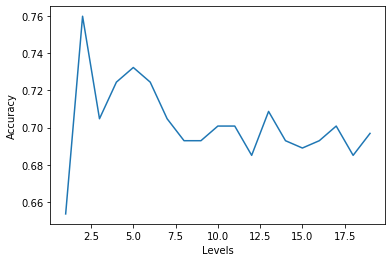

In [7]:
no_of_levels = range(1, 20)
accuracy = list()
for l in no_of_levels:
    data = decision_tree(X, Y, levels=l, min_samples_leaf=1)
    accuracy.append(data['accuracy'])

plt.plot(no_of_levels, accuracy)
plt.xlabel("Levels")
plt.ylabel("Accuracy");

It seems that 7 levels provide optimum accuracy, however with a minimum sample of 1 per leaf, the performance is still quite erratic. We can hope to tune the parameters further by testing between 5 and 10 levels at different minimum sample values

In [8]:
def test_min_samples(levels, max_samples):
    x = list()
    y = list()
    for i in range(1,max_samples):
        data = decision_tree(X, Y, levels=levels, min_samples_leaf=i)
        y.append(data['accuracy'])
        x.append(i)
    
    return [x, y]

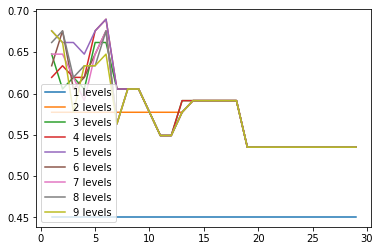

In [18]:
for i in range(1, 10):
    x, y = test_min_samples(i, 30);
    plt.plot(x, y, label=str(i)+ ' levels')

plt.legend()
plt.show()

We can see that 5 levels with a min sample of 6 gives us the optimal accuracy for the decision tree so we can set out parameters and run the test again to see the final tree. Above that, the data is clearly overfitted with all of the trees providing almost identical accuracy on the test set, below that the data is underfitted. 

accuracy at 5 levels is: 0.6901408450704225


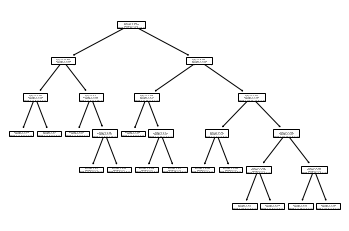

In [24]:
data = decision_tree(X, Y, levels=5, min_samples_leaf=6)
print('accuracy at 5 levels is: ' + str(data['accuracy']))
tree.plot_tree(data['clf']);

## Glass Data Set

We can run the same experiment on the Glass data set:

In [11]:
data = pd.read_csv('glass.csv')
X = data.drop('class', axis=1)
Y = data['class']
accuracy = decision_tree(X, Y, 10, 1)

A single decision tree:

accuracy at 1 level is: 0.4507042253521127


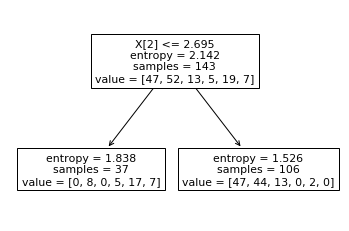

In [12]:
data = decision_tree(X, Y, levels=1, min_samples_leaf=1)
print('accuracy at 1 level is: ' + str(data['accuracy']))
tree.plot_tree(data['clf']);

Finding the optimal number of levels is more dificult as there is no clear optimum between 1 and 100, however as the :

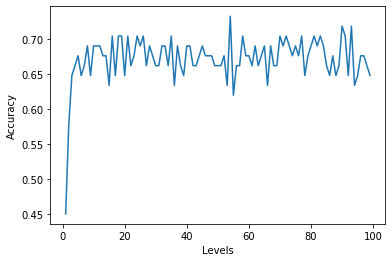

In [13]:
no_of_levels = range(1, 100)
accuracy = list()
for l in no_of_levels:
    data = decision_tree(X, Y, levels=l, min_samples_leaf=1)
    accuracy.append(data['accuracy'])

plt.plot(no_of_levels, accuracy)
plt.xlabel("Levels")
plt.ylabel("Accuracy");

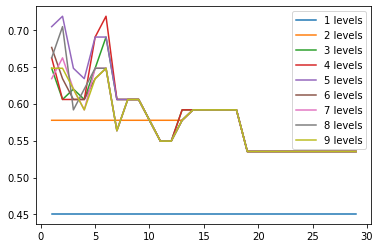

In [14]:
for i in range(1, 10):
    x, y = test_min_samples(i, 30);
    plt.plot(x, y, label=str(i)+ ' levels')

plt.legend()
plt.show()

We can see that the optimal parameters seem to be 4 layers with a minimum samples of 6 providing almost 70% accuracy

accuracy at 4 levels is: 0.6901408450704225


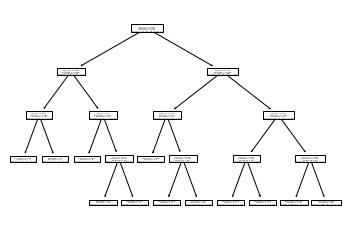

In [15]:
data = decision_tree(X, Y, levels=4, min_samples_leaf=6)
print('accuracy at 4 levels is: ' + str(data['accuracy']))
tree.plot_tree(data['clf']);